#### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import warnings

# Suppress Matplotlib warnings
warnings.filterwarnings('ignore', category=UserWarning)

#### Analyses of given DataSet

In [2]:
dataFrame = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
dataFrame.info()
dataFrame.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [3]:
dataFrame

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
dataFrame.describe().transpose().applymap(lambda x: format(x, '.3f'))

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.000,0.162,0.369,0.000,0.000,0.000,0.000,1.000
tenure,7043.000,32.371,24.559,0.000,9.000,29.000,55.000,72.000
MonthlyCharges,7043.000,64.762,30.090,18.250,35.500,70.350,89.850,118.750


In [5]:
display(dataFrame['Churn'].value_counts(normalize=True))
display(dataFrame['Churn'].value_counts())

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [6]:
display(dataFrame[['Churn', 'gender']].value_counts(normalize=True, sort=False))
display(dataFrame[['Churn', 'gender']].value_counts(sort=False))

Churn  gender
No     Female    0.361920
       Male      0.372710
Yes    Female    0.133324
       Male      0.132046
Name: proportion, dtype: float64

Churn  gender
No     Female    2549
       Male      2625
Yes    Female     939
       Male       930
Name: count, dtype: int64

In [7]:
dataFrame[['Churn', 'SeniorCitizen']].value_counts(sort=False).to_frame().reset_index()

,Churn,SeniorCitizen,count
0,No,0,4508
1,No,1,666
2,Yes,0,1393
3,Yes,1,476


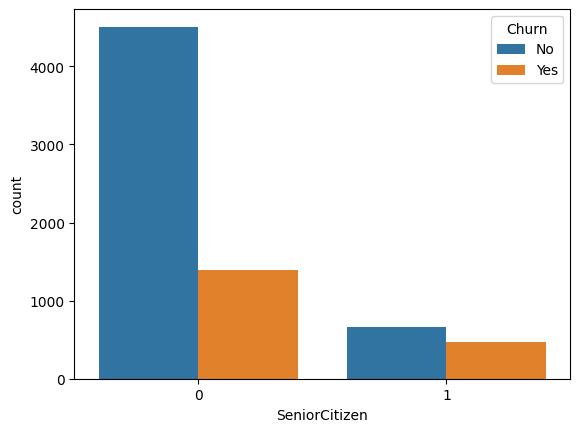

In [8]:
sns.barplot(data=dataFrame[['Churn', 'SeniorCitizen']].value_counts(sort=False).to_frame().reset_index(), 
            x='SeniorCitizen', y='count', hue='Churn')
plt.show()

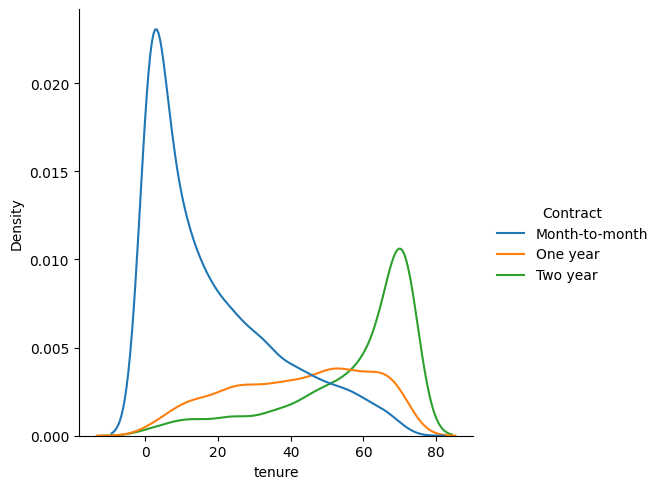

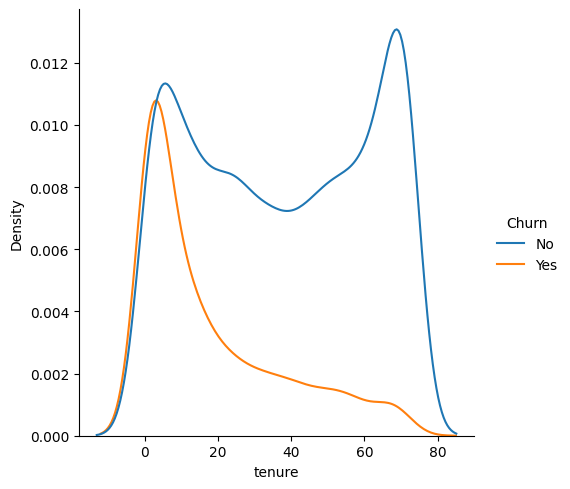

In [9]:
sns.displot(data=dataFrame, x='tenure', hue='Contract', kind='kde')
plt.show()

sns.displot(data=dataFrame, x='tenure', hue='Churn', kind='kde')
plt.show()

Из графиков видно что как люди в зависимости от времени владения собственностью заключают контракты (ежемесячно, раз в год, раз в 2 года)

А также когда чаще всего люди расторгают контракты

#### Naive Bayes Analyses

In [10]:
# Identify non-numeric columns for label encoding
non_numeric_columns = dataFrame.select_dtypes(exclude=['number']).columns

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each non-numeric column
for column in non_numeric_columns:
    dataFrame[column] = label_encoder.fit_transform(dataFrame[column])


In [11]:
X = dataFrame.drop('Churn', axis=1)
Y = dataFrame['Churn']

In [12]:
# Split the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [13]:
# Create instances of Naive Bayes models
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [14]:
# Train the models
gnb.fit(X_train, Y_train)
mnb.fit(X_train, Y_train)
bnb.fit(X_train, Y_train)

BernoulliNB()

In [15]:
# Make predictions
Y_pred_gnb = gnb.predict(X_test)
Y_pred_mnb = mnb.predict(X_test)
Y_pred_bnb = bnb.predict(X_test)

# Get accuracy scores
accuracy_gnb = accuracy_score(Y_test, Y_pred_gnb)
accuracy_mnb = accuracy_score(Y_test, Y_pred_mnb)
accuracy_bnb = accuracy_score(Y_test, Y_pred_bnb)

In [16]:
# Create a pandas DataFrame
results_df = pd.DataFrame({
    'ML Model': ['Gaussian Naive Bayes', 'Multinomial Naive Bayes', 'Bernoulli Naive Bayes'],
    'Accuracy': [accuracy_gnb, accuracy_mnb, accuracy_bnb]
})

display(results_df)

,ML Model,Accuracy
0,Gaussian Naive Bayes,0.757984
1,Multinomial Naive Bayes,0.591199
2,Bernoulli Naive Bayes,0.755145


<p align="center"><img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*Cy9vL0xo0-YwaQQ0PpUxWA.png"/></p>

Мы получили такие результаты так как 

для Gaussian Naive Bayes данные подчиняются гауссовскому (нормальному) распределению 

а Bernoulli Naive Bayes так как он предполагает бинарное распределение (0 - Нет Оттока; 1 - Отток)

для Multinomial Naive Bayes результат точности меньше так как модель лучше работает на данных с большим количеством различных признаков